<a href="https://colab.research.google.com/github/aimlalchemists/bank-churn-prediction-neural-network/blob/main/bank_churn_prediction_neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy"> Bank Churn Prediction </span>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:green">Muthuraman Muthusubramanian</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy"> Problem Statement</span>

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Installing and Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas xgboost -q --user

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [7]:
ds = pd.read_csv("https://raw.githubusercontent.com/aimlalchemists/credit-card-users-churn-prediction/main/Churn.csv")

## Data Overview

### View the first and last 5 rows of the dataset.

In [8]:
# Top 5 rows
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Bottom 5 rows
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [10]:
ds.shape

(10000, 14)

- The dataset has 10000 rows and 14 columns.

### Datatype details

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- This dataset contains 10,000 rows of customer information from a bank, with no missing values.
- It includes various attributes such as customer demographics, account details, and activity status.
- All columns have appropriate data types for their respective fields.

In [12]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Observations.
- CreditScore: Credit scores range from 350 to 850, with a mean of 650.5 and a standard deviation of 96.7. The median (50th percentile) credit score is 652.
- Age: Ages range from 18 to 92 years, with a mean age of 38.9 and a standard deviation of 10.5. The median age is 37.
- Tenure: Tenure ranges from 0 to 10 years, with a mean of 5 years and a standard deviation of 2.9. The median tenure is 5 years.
- Balance: Account balances range from 0 to 250,898.09, with a mean balance of 76,485.89 and a standard deviation of 62,397. The median balance is 97,198.54.
- HasCrCard: Approximately 70.55% of customers have a credit card.
- IsActiveMember: About 51.51% of customers are active members.
- EstimatedSalary: Estimated salaries range from 11.58 to 199,992.48, with a mean of 100,090.20 and a standard deviation of 57,510. The median estimated salary is 100,193.90.
Exited: Approximately 20.37% of customers have exited.

### Check Missing Values

In [13]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


- No Missing values

### Checking for unique values for each of the column

In [14]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


### Observations
- **RowNumber**: Each row number is unique, indicating there are no duplicate rows.
- **CustomerId**: Each customer ID is unique, ensuring that each customer is distinct.
- **Surname**: There are 2,932 unique surnames among the customers.
- **CreditScore**: There are 460 unique credit scores, showing a wide range of credit scores among customers.
- **Geography**: There are 3 unique geographical locations represented in the dataset.
- **Gender**: There are 2 unique values for gender, likely representing male and female.
- **Age**: There are 70 unique ages, indicating a diverse age range among customers.
- **Tenure**: There are 11 unique tenure values, ranging from 0 to 10 years.
- **Balance**: There are 6,382 unique balance values, showing a wide variety of account balances.
- **NumOfProducts**: There are 4 unique values for the number of products, indicating customers have between 1 and 4 products.
- **HasCrCard**: There are 2 unique values, indicating whether customers have a credit card or not.
- **IsActiveMember**: There are 2 unique values, indicating whether customers are active members or not.
- **EstimatedSalary**: There are 9,999 unique estimated salary values, showing a wide range of salaries.
- **Exited**: There are 2 unique values, indicating whether customers have exited or not.


In [15]:
# RowNumber, CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Exploratory Data Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

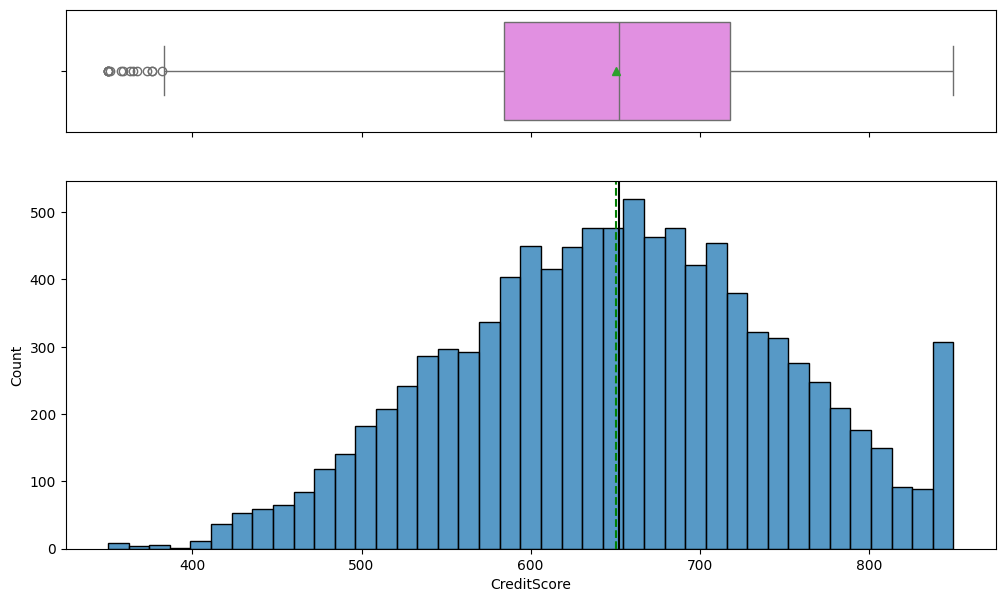

In [19]:
histogram_boxplot(ds, 'CreditScore')

## Credit Score Distribution Analysis

The histogram below represents the distribution of credit scores. Key observations include:

1. **Distribution Shape**: The histogram exhibits a bell-shaped distribution, indicating that the majority of credit scores are concentrated around the 600-700 range.
2. **Mean Credit Score**: A vertical green line marks the mean of the distribution, which is slightly above 600.
3. **Frequency**: The height of the bars indicates the frequency of credit scores within each range. The highest frequencies are observed in the 600-700 range, with fewer scores as the values deviate from this range.

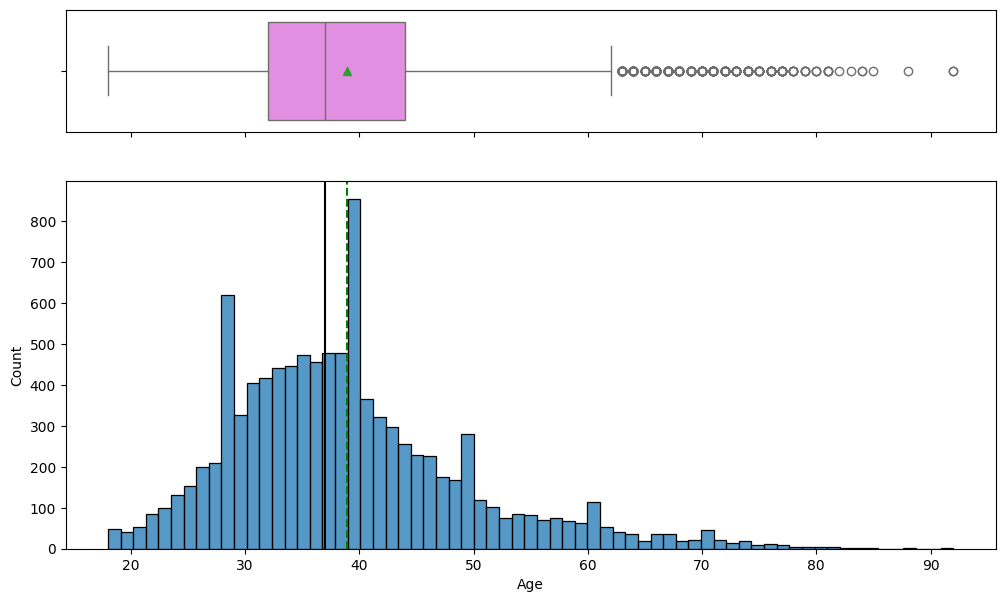

In [20]:
histogram_boxplot(ds, 'Age')

### Observation on Age
- There are few outliers on the age.
- Distribution indicates that while most ages are clustered around a central range, there are more individuals in the higher age groups than would be expected in a normal distribution

### Bivariate Analysis

## Data Preprocessing

### Dummy Variable Creation

### Train-validation-test Split

### Data Normalization

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


### Neural Network with SGD Optimizer

## Model Performance Improvement

### Neural Network with Adam Optimizer

### Neural Network with Adam Optimizer and Dropout

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___